# Sampling

1. **[Literacy Rate Data](#sample1)**
2. **[United States Environmental Protection Agency EPA](#sample2)**

<a id="sample1"> </a>
# Literacy Rate Data

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using numpy, pandas, scipy stats, and statsmodels for operations, and matplotlib for plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
education_districtwise = pd.read_csv('datasets/education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

We’ll continue with our previous scenario, in which you’re a data professional working for the Department of Education of a large nation. Recall that you’re analyzing data on the literacy rate for each district.

Now imagine that you are asked to *collect* the data on district literacy rates, and that you have limited time to do so. You can only survey 50 randomly chosen districts, instead of the 634 districts included in your original dataset. The goal of your research study is to estimate the mean literacy rate for *all* 634 districts based on your sample of 50 districts. 

## Simulate random sampling

You can use Python to simulate taking a random sample of 50 districts from your dataset. To do this, use`pandas.DataFrame.sample()`. The following arguments in the `sample()` function will help you simulate random sampling: 

*   `n`: Refers to the desired sample size
*   `replace`: Indicates whether you are sampling with or without replacement
*   `random_state`: Refers to the seed of the random number

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html.

**Note:**  A **random seed** is a starting point for generating random numbers. You can use any arbitrary number to fix the random seed, and give the random number generator a starting point. Also, going forward, you can use the same random seed to generate the same set of numbers.

Now you’re ready to write your code. First, name a new variable `sampled_data`. Then, set the arguments for the `sample()` function:  

*   `n`: You're sampling from 50 districts, so your sample size is `50`. 
*   `replace`: For the purpose of our example, you'll sample *with* replacement. `True` indicates sampling with replacement. 
*   `random_state`: Choose an arbitrary number for your random seed. Say, `31208`. 



In [3]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data 

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


The output shows 50 districts selected randomly from your dataset. Each has a different literacy rate, but note that row 254 was sampled twice, which is possible because you sampled with replacement. 

### Compute the sample mean

Now that you have your random sample, use the mean function to compute the sample mean. First, name a new variable `estimate1`. Next, use `mean()` to compute the mean for your sample data. 

In [4]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

74.22359999999999

The sample mean for district literacy rate is about 74.22%. This is a point estimate of the population mean based on your random sample of 50 districts. Remember that the population mean is the literacy rate for *all* districts. Due to sampling variability, the sample mean is usually not exactly the same as the population mean. 

Next, let’s find out what will happen if you compute the sample mean based on another random sample of 50 districts. 

To generate another random sample, name a new variable `estimate2`. Then, set the arguments for the sample function. Once again, `n` is `50` and `replace` is "True." This time, choose a different number for your random seed to generate a different sample: 56,810. Finally, add `mean()` at the end of your line of code to compute the sample mean. 

In [5]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

74.2478

For your second estimate, the sample mean for district literacy rate is about 74.25%. 

Due to sampling variability, this sample mean is different from the sample mean of your previous estimate, 74.22% – but they’re really close.

## The central limit theorem 

Recall that the **central limit theorem** tells you that when the sample size is large enough, the sample mean approaches a normal distribution. And, as you sample more observations from a population, the sample mean gets closer to the population mean. The larger your sample size, the more accurate your estimate of the population mean is likely to be. 

In this case, the population mean is the overall literacy rate for *all* districts in the nation. Earlier, you found that the population mean literacy rate is 73.39%. Based on sampling, your first estimated sample mean was 74.22%, and your second estimate was 74.24%. Each estimate is relatively close to the population mean. 

### Compute the mean of a sampling distribution with 10,000 samples

Now, imagine you repeat the study 10,000 times and obtain 10,000 point estimates of the mean. In other words, you take 10,000 random samples of 50 districts, and compute the mean for each sample. According to the central limit theorem, the mean of your sampling distribution will be roughly equal to the population mean. 

You can use Python to compute the mean of the sampling distribution with 10,000 samples. 

Let’s go over the code step by step: 


1. Create an empty list to store the sample mean from each sample. Name this `estimate_list`.
2. Set up a for-loop with the `range() `function. The `range()` function generates a sequence of numbers from 1 to 10,000. The loop will run 10,000 times, and iterate over each number in the sequence.
3. Specify what you want to do in each iteration of the loop. The `sample()` function tells the computer to take a random sample of 50 districts with replacement–the argument `n` equals `50`, and the argument `replace` equals `True`. The `append() `function adds a single item to an existing list. In this case, it appends the value of the sample mean to each item in the list. Your code generates a list of 10,000 values, each of which is the sample mean from a random sample. 
4. Create a new data frame for your list of 10,000 estimates. Name a new variable `estimate_df` to store your data frame. 

In [6]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

Note that, because you didn't specify a random seed for each loop iteration, by default the rows sampled will be different each time.

Now, name a new variable `mean_sample_means` and compute the mean for your sampling distribution of 10,000 random samples.

In [7]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.4000264

The mean of your sampling distribution is about 73.4%.

Compare this with the population mean of your complete dataset:

In [8]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

73.39518927444796

The mean of your sampling distribution is essentially identical to the population mean, which is also about 73.4%! 

### Visualize your data
​
To visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution, we can plot both at the same time.
 
​
**Note**: The code for this plot is beyond the scope of this course. 

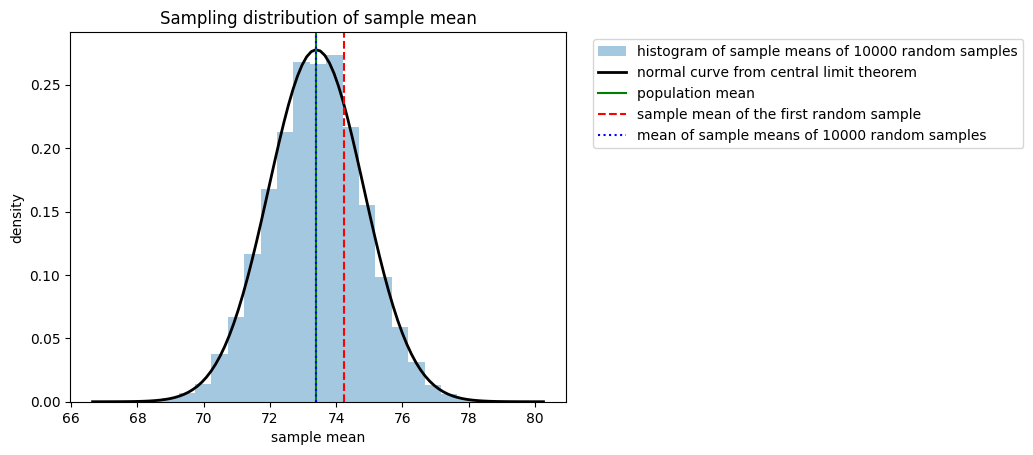

In [9]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

There are three key takeaways from this graph:

1. As the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve.
2. The mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other.  
3. The sample mean of your first estimate of 50 districts, the red dashed line, is farther away from the center. This is due to sampling variability. 

The central limit theorem shows that as you increase the sample size, your estimate becomes more accurate. For a large enough sample, the sample mean closely follows a normal distribution. 

Your first sample of 50 districts estimated the mean district literacy rate as 74.22%, which is relatively close to the population mean of 73.4%. 

To ensure your estimate will be useful to the government, you can compare the nation’s literacy rate to other benchmarks, such as the global literacy rate, or the literacy rate of peer nations. If the nation’s literacy rate is below these benchmarks, this may help convince the government to devote more resources to improving literacy across the country. 


<a id="sample2"> </a>
# Explore sampling - United States Environmental Protection Agency EPA

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [10]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

### Load the dataset

Load the dataset provided. The dataset is in the form of a csv file.

In [11]:
# Load data
epa_data = pd.read_csv("datasets/c4_epa_air_quality.csv", index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'c4_epa_air_quality.csv'